 In this tutorial, you’re are going to create a neural network that predicts if a person will have heart disease or not. You’ll use a heart disease dataset from the UCL data repository. 

In [26]:
#prepare data downloaded from UCL

import csv
import pandas as pd

# add header names
headers =  ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

heart_df = pd.read_csv('heart.dat', sep=' ', names=headers)

In the code block above, you first set the header, which is the column names for the data set. You can get these names from the dataset description file also in the data page. Notice the sep parameters passed to Pandas read function? this tells pandas that the data is separated by spaces and not the default commas.

In [27]:
heart_df.head()

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


From the head of the data, you can see the features present, and you can begin to imagine the kind of analysis you’ll need to perform on the dataset. Next, print out the shape of the data:

In [28]:
heart_df.shape

(270, 14)

There are 270 observations. This means that your neural network will have an input data of shape 270 x 13, excluding the target variable (heart_disease). The features present in the dataset are:

age<br/>
sex<br/>
chest pain type (4 values)<br/>
resting blood pressure<br/>
serum cholesterol in mg/dl<br/>
fasting blood sugar > 120 mg/dl<br/>
resting electrocardiographic results (values 0,1,2)<br/>
maximum heart rate achieved<br/>
exercise-induced angina<br/>
oldpeak (ST depression induced by exercise relative to rest)<br/>
the slope of the peak exercise ST segment<br/>
number of major vessels (0–3) colored by fluoroscopy<br/>
thal (3 = normal; 6 = fixed defect; 7 = reversible defect)<br/>
heart_disease: absence (1) or presence (2) of heart disease<br/>

Next, you can check for missing values and also the data types. A Neural Network expects all features to be numeric and not contain missing values.

In [29]:
heart_df.isna().sum()


age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64

In [30]:
heart_df.dtypes

age                        float64
sex                        float64
chest_pain                 float64
resting_blood_pressure     float64
serum_cholestoral          float64
fasting_blood_sugar        float64
resting_ecg_results        float64
max_heart_rate_achieved    float64
exercise_induced_angina    float64
oldpeak                    float64
slope of the peak          float64
num_of_major_vessels       float64
thal                       float64
heart_disease                int64
dtype: object

There are no missing values in the dataset, and all features are numeric. Next, you’ll separate the target from the data, split into train and test set, and then standardize the data.

In [31]:
import numpy as np
import warnings
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#convert imput to numpy arrays
X = heart_df.drop(columns=['heart_disease'])

#replace target class with 0 and 1 
#1 means "have heart disease" and 0 means "do not have heart disease"
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1, 0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2, 1)

y_label = heart_df['heart_disease'].values.reshape(X.shape[0], 1)


#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2, random_state=2)

(270,)


In the code block above, first, you dropped the target from the training dataset, and the replace the classes with 0 and 1.  <br> 
Notice you reshaped the y_label to a 1-D array. This is important when you start performing dot products. <br>
Next, you used the handy train_test_split function from sklearn to split the data into train and test set, with the test set taking 20 percent of the data.<br>

<h3>Next we'll perform feature scaling on the dataset using the StandardScaler class from the scikit-learn library in Python.</h3>

The dataset is split into two parts: Xtrain and Xtest, which are typically the training and testing sets for a machine learning model.

The StandardScaler() object is first initialized, which will be used to standardize the features in the dataset. Then, the fit() method is called on the training set Xtrain to calculate the mean and standard deviation of each feature in the dataset. These statistics will be used to transform the data so that it has zero mean and unit variance.

Next, the transform() method is called on both the training set Xtrain and the testing set Xtest. This applies the scaling transformation to each set, based on the mean and standard deviation calculated from the training set.

By performing feature scaling, the code is ensuring that the features in the dataset have a similar scale and that one feature doesn't dominate over the others due to its larger magnitude. This can be important for many machine learning algorithms, especially those based on distance calculations or regularization.

In [ ]:
#standardize the dataset
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

<h3>The Layers of a Neural Network</h3>
Now that you have downloaded and prepared the dataset, let’s start building the neural network to make predictions. To do that, you first, need to understand the concept of layers.

Remember when I said a neural network stacks multiple neurons together to build really large and complex mathematical functions? Well, the official name for it is a layer. The layer is a collection of nodes at different stages of computation in a neural network. Each node acts as a neuron and performs calculations on the data passed to it. Look at the illustration of a 3-layer neural network below:


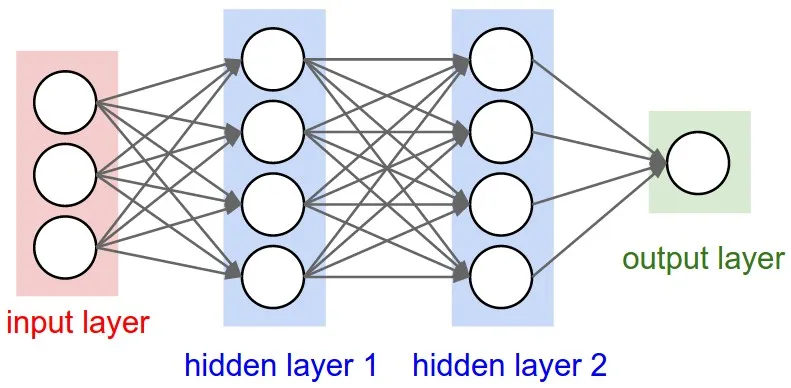

Yeah I know, you see four layers—but in deep learning, you don’t count the first layer. The first layer is called the input layer, and the number of nodes will depend on the number of features present in your dataset. In our case, it will be 13 nodes because we have 13 features.
<br/><br/>
The final layer of the neural network is called the output layer, and the number depends on what you’re trying to predict. For regression and binary classification tasks, you can use a single node; while for multi-class problems, you’ll use multiple nodes, depending on the number of classes.
<br/><br/>
In this article, you’ll use a single node for your final layer, because you're working on a binary classification task.
<br/><br/>
The layers between the input and the final layer is where the magic happens— these are called the hidden layers. The hidden layers can be as deep or wide as you want, and while a deeper network is better, the computational time also increases as you go deeper.
<br/><br/>
In order to keep things relatively simple, you’re going to design and code a 2-layer neural network. Below is a preview of the architecture:<br/>

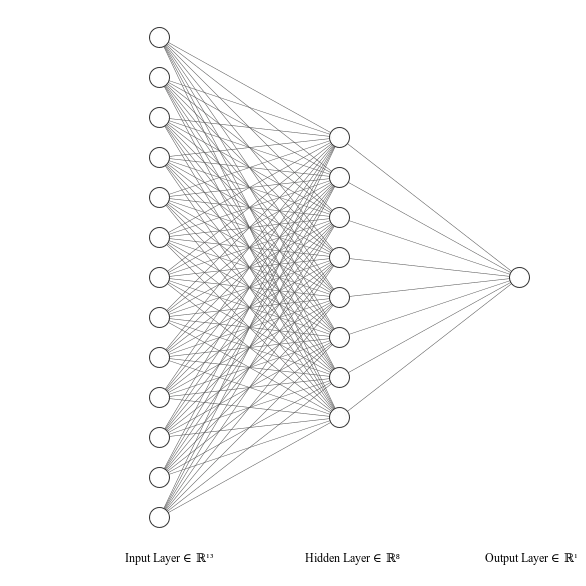


<br/>
The neural net above will have one hidden layer and a final output layer. The input layer will have 13 nodes because we have 13 features, excluding the target. The hidden layer can accept any number of nodes, but you’ll start with 8, and the final layer, which makes the predictions, will have 1 node. Next, let’s talk about weights and biases that each layer must-have.

<h3>The Weights and Biases</h3><br/>
Weights and biases are the learnable parameters that help a neural network correctly learn a function. Think of weights as a measure of how sure you are that a feature contributes to a prediction and the bias as a base value that your predictions must start from.
<br/><br/>
I’ll give you an illustration.

Assume you’re a machine learning model, and you want to predict if a person is rich or not, and you have been given the following clues to help you make that decision:
<br/><br/>
Age of the person<br/>
Height of the person<br/>
Salary of the person<br/><br/>
The clues above are what we call features in machine learning, and what you want to predict is called the target/label/ground truth. The label can be one of two classes (rich, not rich)—in other words, binary classification.
<br/><br/>
Basically, what you want to do is combine the features in such a way that they help you more accurately predict the outcome.
<br/>
y(rich, not rich) = Age + Height + salary + [base]
<br/><br/>
Assuming we set a base salary of $3000, and Person 1 has the following features; age = 18, height = 5.6ft, salary = $2000, then you’ll calculate the richness as follows:
<br/><br/>
y(rich, not rich) = 18 + 5.6 + 2000 + 3000 = ~5024
<br/><br/>
For this example, we might define a threshold for richness as any value greater than $40,000. Judging by these criteria, you can conclude that person 1 is not rich. Let’s look at another example.
<br/><br/>
Person 2 has the following features; age = 26, height = 5.2ft and salary = $50,000. Your prediction will calculated as:
<br/><br/>
y(rich, not rich) = 26 + 5.2 + 50000 + 3000 = ~53031
<br/><br/>
Then, by the threshold earlier stated, person 2 is rich.
<br/><br/><br/>
It’s obvious that some clues are more important than others. Can you guess which one is the most important? Yes! Salary. This is, perhaps unsurprisingly, an important factor that indicates whether a person is rich or not.
<br/><br/>
Using this idea, you can assign importance to the features. For instance, you can assign weights as follows:
<br/><br/>
y(rich,not rich) = (2 * Age) + (1 * Height) + (8 * Salary) + base
<br/><br/>
Intuitively, we assign a higher value to the salary feature.
<br/><br/>
The importance of the value can be any number but must be representative of scale.
<br/><br/>
You might be wondering what the base value of 3000 is and why we add it to the predictions. This value is called the bias. It is a base value that every prediction must-have, even when nothing else is given.
<br/><br/><br/>
Now, if you make a prediction for person 1 and 2 again, you’ll have the following:
<br/><br/>
Person 1: (2 * 18) + (1 * 5.6) (8 * 2000) + 3000 = ~19041 (still poor)
<br/><br/>
Person 2: (2 * 26) + (1 * 5.2) + (8 * 5000) + 3000 = ~43057 (Still rich)
<br/><br/><br/>
What if a person has no value for age, height, and salary, then your prediction will be?
<br/><br/>
y(rich, not rich) = (2 * 0) + (1 * 0) (8 * 0) + 3000 = 3000
<br/><br/><br/>
Now you see where the bias value comes in.
<br/><br/><br/>
What you should take away from the examples above is the fact that importance values assigned to features are called weights, and the base value is called the bias.
<br/><br/><br/>
A machine learning model uses lots of examples to learn the correct weights and bias to assign to each feature in a dataset to help it correctly predict outputs.
<br/><br/><br/><br/>
Back to our proposed solution. You now know that every feature in our dataset must be assigned a weight and that after doing a weighted sum, you add a bias term.
<br/><br/>


<h2>In the code block below, you’ll create your neural network class and initialize those weights and biases:</h2>



In [ ]:
class NeuralNet():
    '''
    A two layer neural network
    '''
        
    def __init__(self, layers=[13,8,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)

First, you create a neural network class, and then during initialization, you created some variables to hold intermediate calculations. The argument layers is a list that stores your network’s architecture. You can see that it accepts 13 input features, uses 8 nodes in the hidden layer (as we noted earlier), and finally uses 1 node in the output layer. We’ll talk about the other parameters such as the learning rate, sample size and iterations in later sections.
<br><br>
Moving on to the next code section, you created a function (init_weights) to initialize the weights and biases as random numbers. These weights are initialized from a uniform random distribution and saved to a dictionary called params.
<br><br>
You’ll notice that there are two weight and bias arrays. The first weight array (W1) will have dimensions of 13 by 8—this is because you have 13 input features and 8 hidden nodes, while the first bias (b1) will be a vector of size 8 because you have 8 hidden nodes.
<br><br>
The second weight array (W2) will be a 10 by 1-dimensional array because you have 10 hidden nodes and 1 output node, and finally, the second bias (b2) will be a vector of size because you have just 1 output.
<br><br>
I’m guessing you’re seeing a pattern here. That is, if you have a neural network with the following architecture [20,30,2], then you know you’ll have the following dimensions for your weights and biases:
<br><br>
W1 = (20,30) , b1 = (30,)
<br><br>
W2 = (30, 2), b2 = (2,)
<br><br>
And if you have a 3 layer architecture like [5,7,8,2], then you know you’ll have 3 weights and 3 biases with the following shapes:
<br><br>
W1 = (5,7), b1 = (7,)
<br><br>
W2 = (7,8), b2 = (8,)
<br><br>
W3 = (8,2), b3 = (2,)
<br><br>
So what will the dimensions be for a neural network with this architecture [20, 23, 2]?<br><br>

<h3>The Activation Function</h3>
Now that you’ve initialized the weights and biases, let’s talk about activation functions. Activations are the nonlinear computations done in each node of a Neural Network. Remember when I told you that each node performs some mathematical computation? Well, that computation happens in two phases.
<br><br>
First, you do a weighted sum of the input and the weights, add the biases, and then pass the result through an activation function. I’ll explain why we do that below.
<br><br>
An activation function is what makes a neural network capable of learning complex non-linear functions. Non-linear functions are difficult for traditional machine learning algorithms like logistic and linear regression to learn. The activation function is what makes a neural network capable of understanding these functions.
<br><br>
There are many types of activation functions used in deep learning—some popular ones are Sigmoid, ReLU, tanh, Leaky ReLU, and so on. Each activation function has its pros and cons, but the ReLU function has been shown to perform very well, so in this article, you’ll use the ReLU function.
<br><br>

Different activation functions used in deep learning (Image source) <br><br>
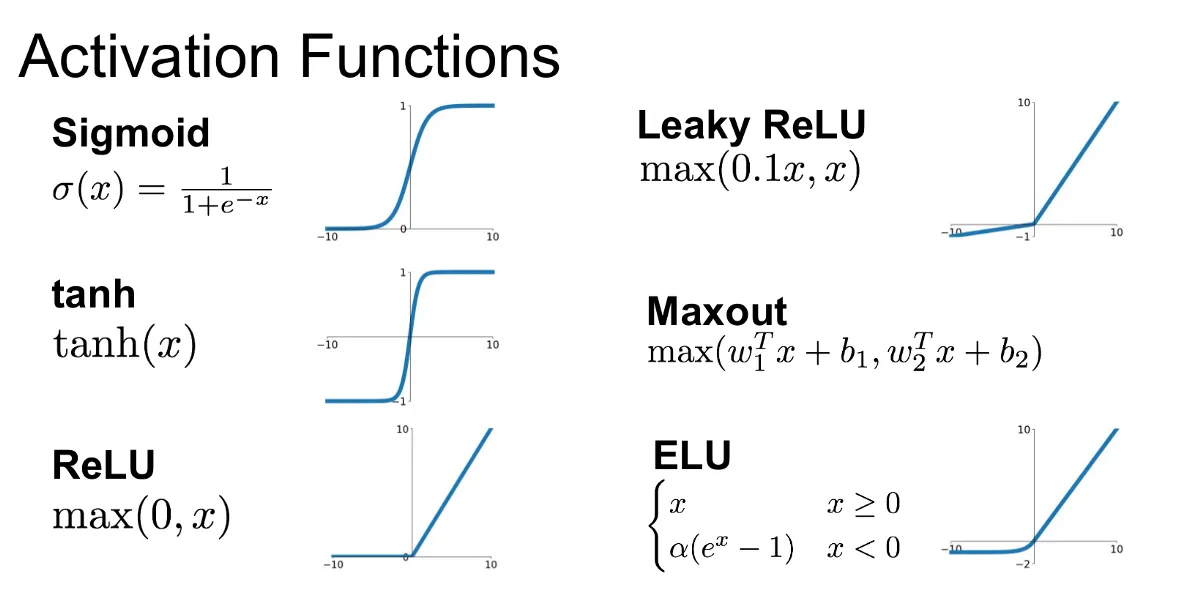
<br><br>
The activation function is computed by each node in the hidden layers of a neural network. This means you’ll have to pass the weighted sums through the ReLU function.
<br><br>
<h3>But what is ReLU?</h3>

ReLU (Rectified Linear Unit) is a simple function that compares a value with zero. That is, it will return the value passed to it if it is greater than zero; otherwise, it returns zero.
<br><br>
The code for the ReLU function is shown below:<br><br>

In [ ]:
def relu(self,Z):
        '''
        The ReLu activation function is to performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0,Z)